<a href="https://colab.research.google.com/github/hassanteymoori/Insurance-claims-over-cars/blob/main/FDS_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-info">
    <h1>
        <center>
        <font color=LightSeaGreen> Insurance Claims Over cars<font>
        </center>
    </h1>
</div>
<hr/>

# The Classification Task and Motivation

* **Problem statement:** <br/>
Car Insurance Claim dataset is used to see which insured client asks the car insurance company to compensate him/her for the damages that are sustained by his/her car after an accident.

* **Motivation:** <br/>
Help the insurance companies to decide whether or not issue insurance to a particular customer with respect to his situation to make more profit. 

* **Dataset:**<br/>
You can find the dataset through this [link](https://www.kaggle.com/sagnik1511/car-insurance-data ). 


# Configuration and Imports

---
We decided to load the csv file with pandas dataframe.


In [ ]:
# Pandas and numpy for data manipulation as we use it many times with alias 'pd', 'np'
import pandas as pd
import numpy as np

# Matplotlib and seaborn visualization
import matplotlib.pyplot as plt
import seaborn as sn

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# As we see in the class we use this line of the code in order to show the figures inline.
%matplotlib inline 

# Set default font size
plt.rcParams['font.size'] = 15

# during the hyper parameter tuning I face many messy warning which make me a little bit unhappy. because
# could not focus on the measure or report of my model selection. I had to scroll too much. By searching into
# the we I found this line of the code. 
import warnings
warnings.filterwarnings('ignore')
# - ignore is to hide the warning
# - always is to show the warning


#  1. Data Acquisition and Preprocessing
<hr/>
This is the first step we need to accomplish before going any further. The dataset will be downloaded and loaded as usual. 
Some preprocessing such as checking the missing values and duplication will be addressed.

## Download Dataset
Download the dataset to the root directory of ```colab``` using ```wget```. Let's create a directory specifically for our dataset. 

- Download the dataset to root directory
- Make a directory called dataset
- Moved downloaded csv file into dataset directory

In [ ]:
import os
os.system(
    "wget -q https://www.dropbox.com/s/oufke7d414m40p8/data.csv"
    )

if os.path.exists('dataset') is False:
    !mkdir dataset
!mv data.csv dataset

## Load the dataset
We use Pandas dataframe to read and load the our dataset.

In [ ]:
dataFrame = pd.read_csv(filepath_or_buffer="dataset/data.csv", 
                        sep=',',
                        index_col= None)

## Dataset Structure 
We are going to see some usefull information about the dataset like : 
**Number of rows and columns** (so-called dataset shape).

In [ ]:
row_number, col_number = dataFrame.shape
print(f'The dataset contains \'{row_number}\' rows.')
print(f'The dataset also has \'{col_number}\' columns')

The dataset contains '10000' rows.
The dataset also has '19' columns


We are going to take a look at the dataset.

In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

Take a look at the first 5 records.

In [ ]:
dataFrame.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


Summary statistics of the dataset. 

In [ ]:
dataFrame.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


## Dataset Description

The dataset contains **10K** records of people's insurance Claims over Cars; each record, contains the following set of **19** columns:

- `ID`: A unique identity number assigned to the customer by the company(_numerical_);

- `AGE`: The age of the customer represented by text (e.g. 16-25).(_categorical_);

- `GENDER`: The biological sex of the customer (_binary categorical_);

- `RACE`: Descriptions of the customer's race (_binary categorical_);

- `DRIVING_EXPERIENCE`: Duration of having driving exprience (_categorical_);

- `EDUCATION`: The highest level of education achieved by the customer(_categorical_);

- `INCOME`: Income class of the customer (_categorical_);

- `CREDIT_SCORE`: Represents the probability of the customer filing an insurance claim while under coverage (_numerical continuous_);

- `VEHICLE_OWNERSHIP`: Whether the customer is the owner of the car or not (_binary numerical_).;

- `VEHICLE_YEAR`: The approximated year of the car's built (_categorical_);

- `MARRIED`: The marriage status of the customer (_binary numerical_);

- `CHILDREN`: Whether the customer has a child or not (_binary numerical_);

- `POSTAL_CODE`: The postal code of the cutomer's house (_numerical_);

- `ANNUAL_MILEAGE`: The amount of distance that the customer traveled in a year represented in KM (_numerical continuous_);

- `VEHICLE_TYPE`: The type of customer's car (_binary categorical_);

- `SPEEDING_VIOLATIONS`: The number of speeding violations of the customer (_numerical_) ;

- `DUIS`: The number of the times that customer caught while driving under influence (_numerical_);

- `PAST_ACCIDENTS`: The number of past accident of the customer (_numerical_);

- **`Outcome`**: Whether the customer claimed his loan from insurance or not (“1” for “Yes”, “0” for “No”); **[This is the _target_ variable we want to classify or predict]**





## Dataset Observation
- The dataset contains 7 categorical features (target feature included) and 11 numerical features (ID included).
- The dataset has many categorical feature that are needed to be encoded.
- **Outcome** is the target feature.
- Numerical features are both integers and floats. 
- We will check for possible missed and duplicated values.

## Preprocessing/Cleaning

In this section we go through these processes: 
* Checking duplicate records
* How to deal with records with missing values included (imputation/drop)
* Checking unique values for each column


## Check duplicate/missing values

Checking for duplicated records in the dataset. 

In [ ]:
dataFrame[dataFrame.duplicated()].sum()

ID                     0.0
AGE                    0.0
GENDER                 0.0
RACE                   0.0
DRIVING_EXPERIENCE     0.0
EDUCATION              0.0
INCOME                 0.0
CREDIT_SCORE           0.0
VEHICLE_OWNERSHIP      0.0
VEHICLE_YEAR           0.0
MARRIED                0.0
CHILDREN               0.0
POSTAL_CODE            0.0
ANNUAL_MILEAGE         0.0
VEHICLE_TYPE           0.0
SPEEDING_VIOLATIONS    0.0
DUIS                   0.0
PAST_ACCIDENTS         0.0
OUTCOME                0.0
dtype: float64

As we can see above, we **don't have any** duplicated record in the dataset. 

Checking for records that are containing missing values. 

In [ ]:
null_columns = dataFrame.columns[dataFrame.isnull().any()]

print('List of columns consisting null values and their quantity:')
print(dataFrame[null_columns].isnull().sum())


List of columns consisting null values and their quantity:
CREDIT_SCORE      982
ANNUAL_MILEAGE    957
dtype: int64


We have **982** missed values in **'CREDIT_SCORE'** and **957** in **'ANNUAL_MILEAGE'** columns. 

Visualizing the missed values in the whole dataset. 

Text(0.5, 1.0, 'Missingno Visualization')

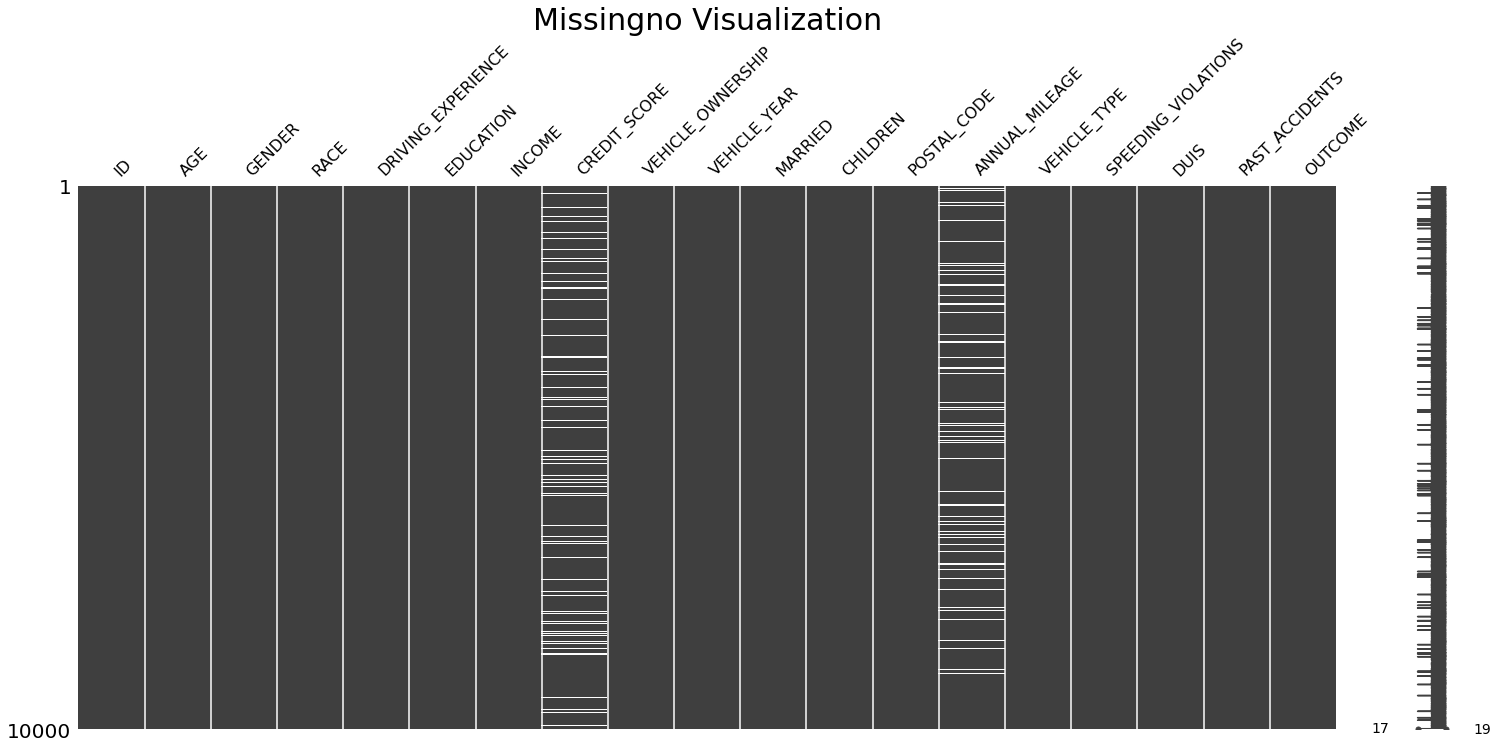

In [ ]:
import missingno as msno
msno.matrix(dataFrame)
plt.title('Missingno Visualization', fontsize=30)

Text(0.5, 1.0, 'Missingno Visualization')

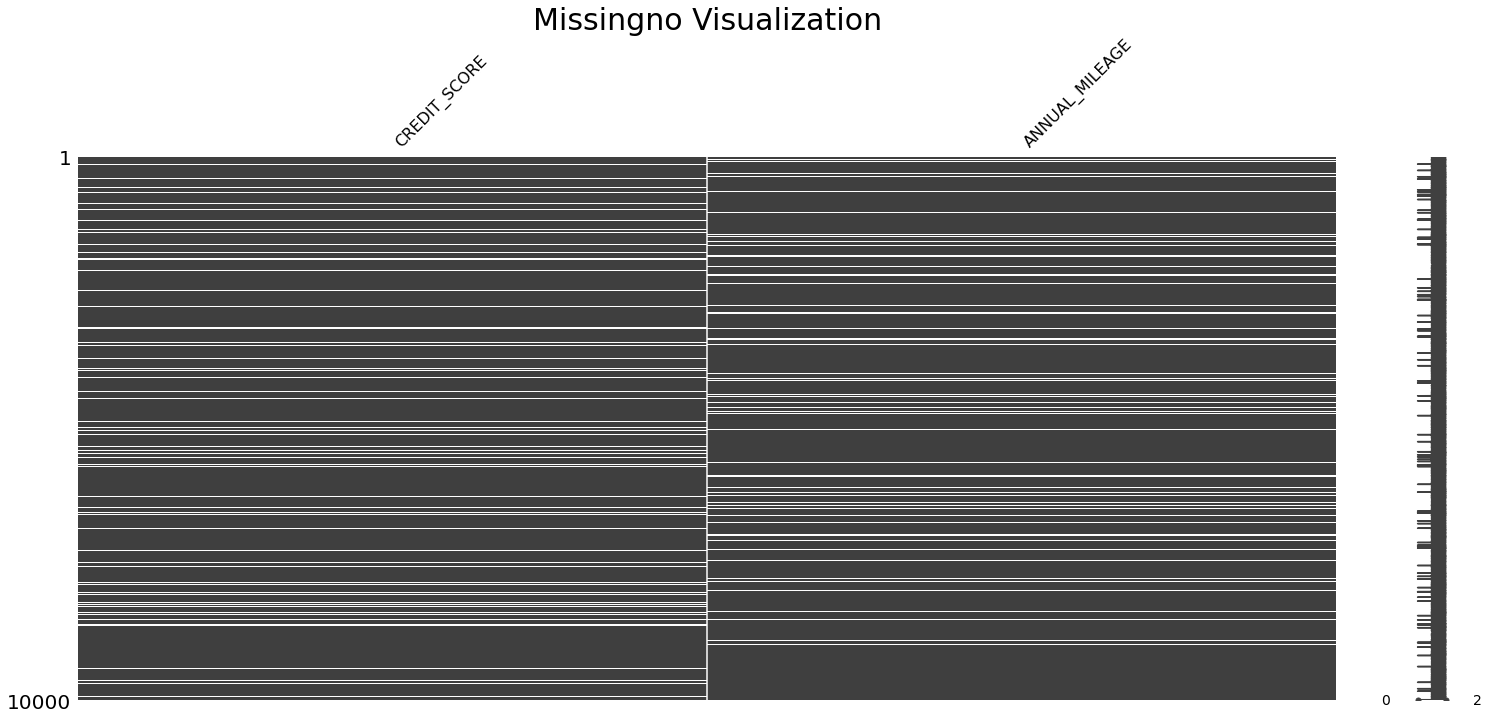

In [ ]:
import missingno as msno
msno.matrix(dataFrame[['CREDIT_SCORE','ANNUAL_MILEAGE']])
plt.title('Missingno Visualization', fontsize=30)

We will make a folder to save our plots images. 

In [ ]:
# Saving the image 
if os.path.exists('images') is False:
    !mkdir images
plt.savefig('images/missing.png')


<Figure size 432x288 with 0 Axes>

## Handling missing values 
We will handle missing values in two approaches: 
1. **Imputation** (completing missing values via imputation)
2. **Drop** (dropping records that are containing missing values)

In [ ]:
# Creating a copy of data set to be used for imputaion method
df_impute = dataFrame.copy()
# Creating a copy of data set to be used for dropping method
df_dropna = dataFrame.copy()

### 1. **Imputation**

In imputation approach, we will try to **fill the missed values** by putting **the average of the values in the column** of the missed value. 

Apply the imputation to **'CREDIT_SCORE**' and **'ANNUAL_MILEAGE**'.

In [ ]:
#Impute 'CREDIT_SCORE' and 'ANNUAL_MILEAGE' columns using Simple imputer 
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
imputed_temp = imp.fit_transform(df_impute[null_columns])
df_impute[null_columns] = imputed_temp

Now we will check how are the results after performing imputation on these two columns.


In [ ]:
df_impute.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

Here we will check out the number of the records in the dataset after applying imputation. 

In [ ]:
df_impute.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


As we can see from the results above, we didn't miss any records but we filled all the missed values. 

### 2. **Dropping**

We check what is the percentage of the all records that having missing values with respect to all the records in the dataset. 
* **Note:** If this percentage was not high, we will consider to drop these records. 

In [ ]:
# Percentage of total missing values
Temp = dataFrame.dropna(axis = 0)
print('The percentage of total missing values is :  \'' +  str(round((((len(dataFrame) - len(Temp))/ len(dataFrame))*100), 2))+ '%\''
)

The percentage of total missing values is :  '18.51%'


As the percentage of such records **is not high**, we will **drop** the records that are containing missing values. 

In [ ]:
df_dropna.dropna(axis=0,inplace=True)

In [ ]:
df_dropna.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

We will check how many records we dropped from the dataset. 

In [ ]:
print(f'#Records in the dataset: \'{len(dataFrame)}\'')
print(f'#Records after dropping: \'{len(df_dropna)}\'')
print(f'#Dropped records: \'{len(dataFrame)-len(df_dropna)}\'')

#Records in the dataset: '10000'
#Records after dropping: '8149'
#Dropped records: '1851'


* **Note:** From now on, we will consider the dataframe after dropping the rows that are contaning missing values. 


In [ ]:
dataFrame = df_dropna

* **Note:** Here we have assumed that two columns which are 'ID' and 'POSTAL_CODE' won't affect our target feature. So we will drop these two columns from the dataFrame. 

In [ ]:
dataFrame.drop(columns = ['ID', 'POSTAL_CODE'], axis = 1, inplace = True)

## Dataset Categorization
Here we will take a look at the distribution of **the type of the columns** that we have in the dataset. 

,0,1,2,3,4,5,6,7
Column Name,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE,RACE



--------------------------------------------------


,0,1,2,3,4,5,6,7,8
Column Name,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME



--------------------------------------------------


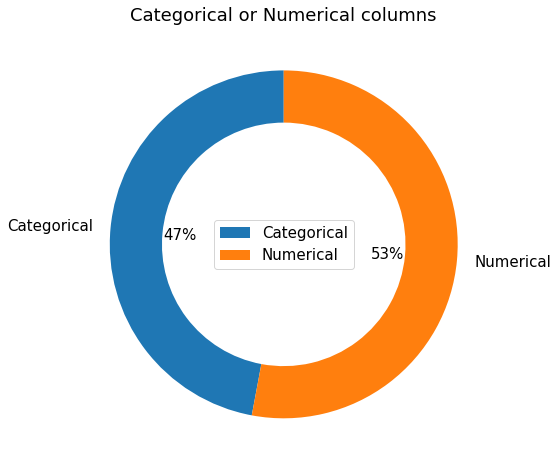

In [ ]:
# This function given a list of columns, will put them in a dataframe
def List_visualization(Values):
  Temp_df = pd.DataFrame(columns = ['Column Name'])
  for i in Values: 
    Temp_df = Temp_df.append({'Column Name':i},ignore_index = True )
  Temp_df = Temp_df.T.style.set_properties(**{'font-size': '8pt'})
  return Temp_df

# Here we will take a look at what are our categorical and numerical features
df = dataFrame.copy()

# Extract categorical columns
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]

# To put Race column at the end of the list
# as we want to show Race and vehicle type together
# in the following sections
cat_cols.append(cat_cols[2])
del cat_cols[2]

display(List_visualization(cat_cols).set_caption('Categorical_features'))

print('\n'+'-'*50)

# Extract numerical columns
num_cols = [col for col in df.columns if df[col].dtypes != "O"]
display(List_visualization(num_cols).set_caption('Numerical_features'))


# Plotting the distribution of the categorical or numerical types
print('\n'+'-'*50)
fig, ax = plt.subplots(figsize=(12, 8)) 
ax.pie([len(cat_cols), len(num_cols)], labels =['Categorical', 'Numerical'], wedgeprops={'width':0.3}, startangle=90, autopct = '%1.0f%%')
ax.legend(loc = 'center')
plt.title('Categorical or Numerical columns')
plt.show()

# 2. Data Exploration and analysis

Before starting with learning pipline of any  modeling technique, the best practice is  to explore your dataset and calculate a few statistics from your data. In addition, drawing specific plots may help us spot interesting facts like correlations, outliers and etc.

## Each Column Distribution

Here we will check the distribution of the values in each column of the dataset. 

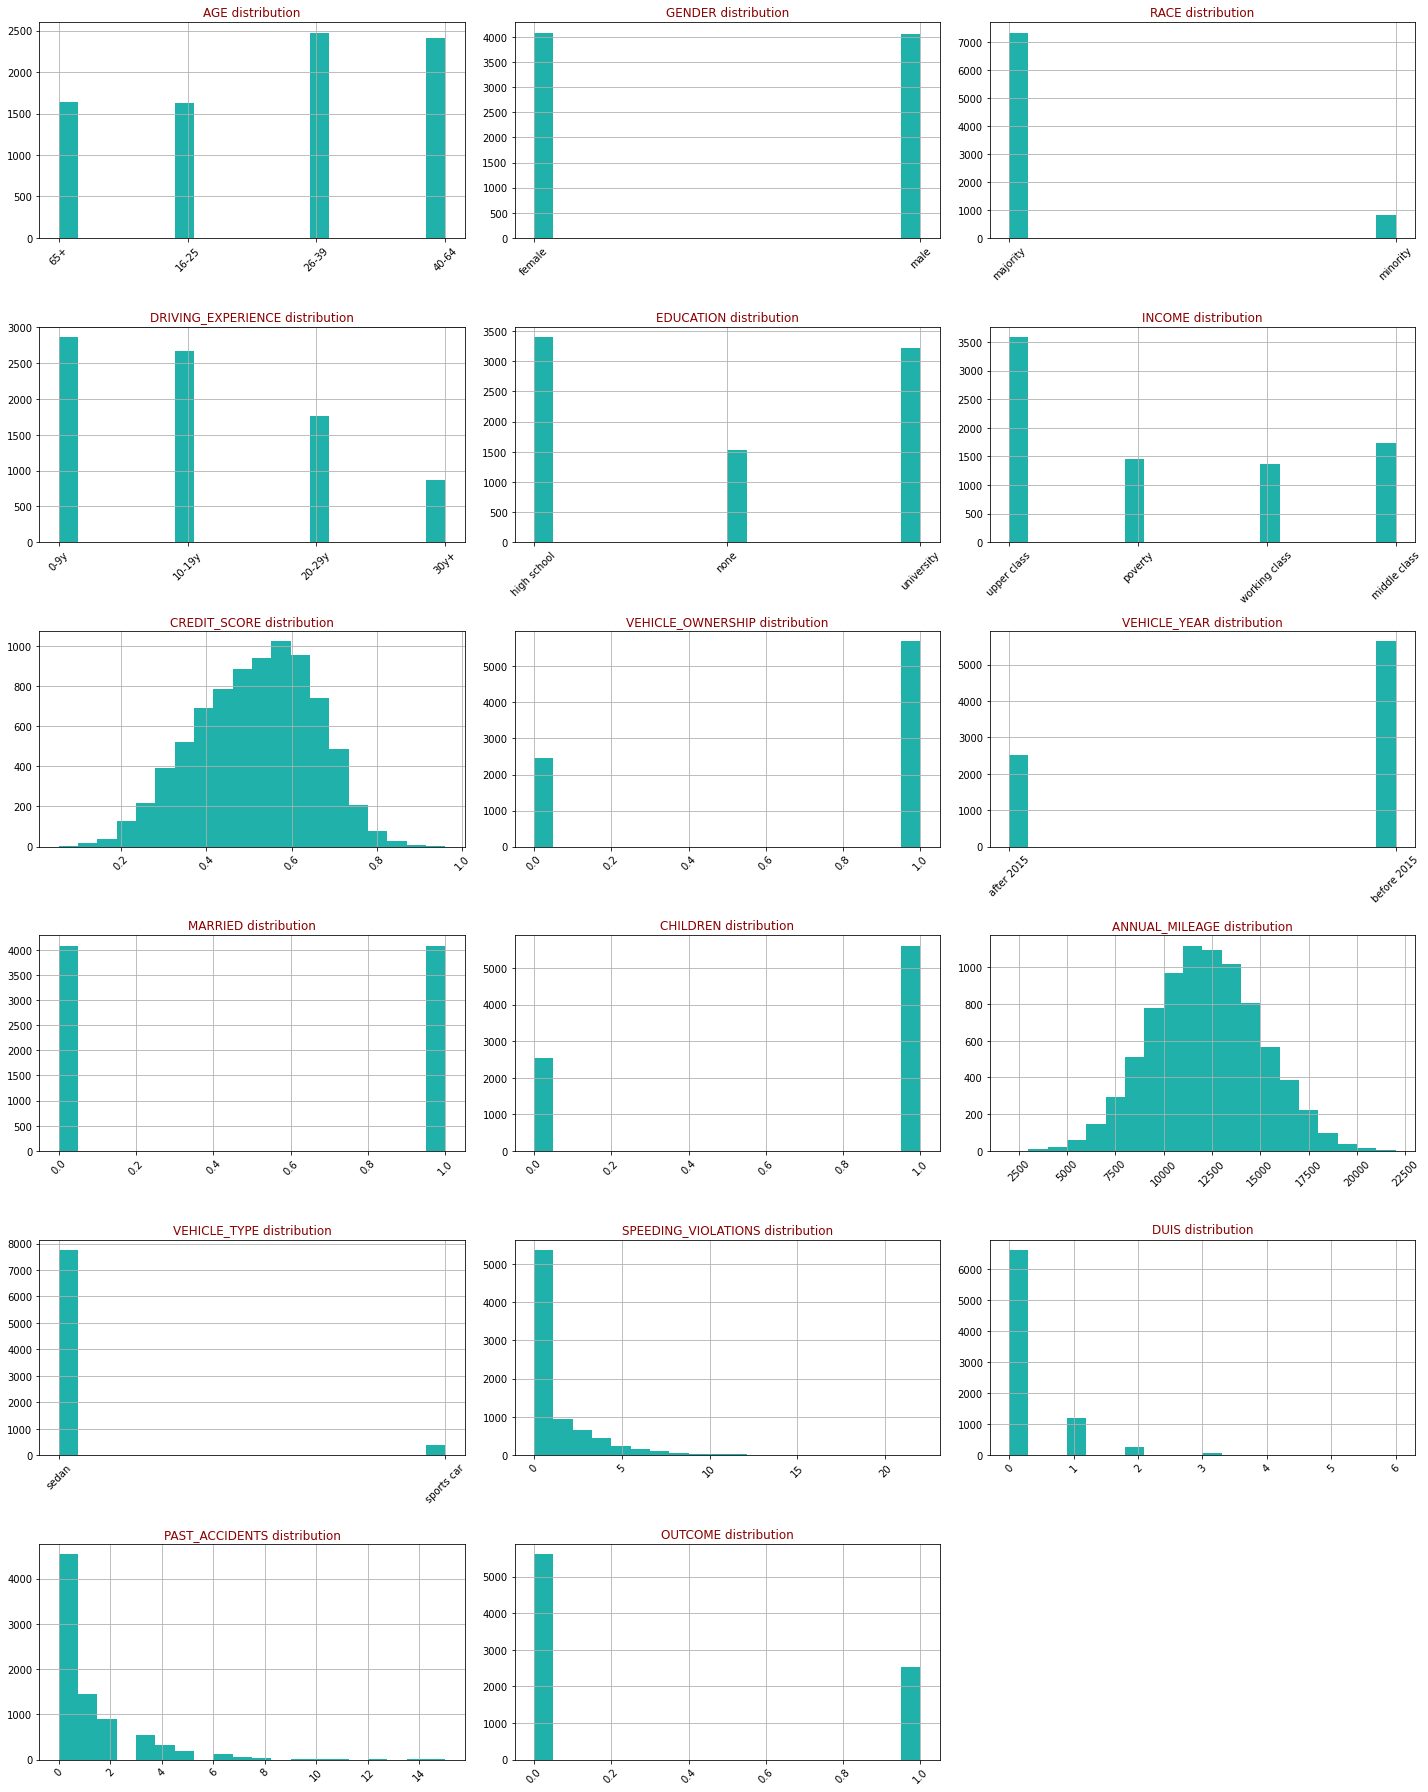

In [ ]:
fig=plt.figure(figsize=(20,25))

for index, column in enumerate(dataFrame.columns):
    ax=fig.add_subplot(6,3,index+1)
    dataFrame[column].hist(bins=20,ax=ax,facecolor='LightSeaGreen')
    plt.xticks(rotation = 45)
    ax.set_title(column + " distribution",color='darkred')
  
fig.tight_layout()  
plt.savefig('images/distribution.png')
plt.show()


Seeing the plots above we can say: 
* **'CREDIT_SCORE'** and **'ANNUAL_MILEAGE'** features are distributed normally. 
* **'RACE'** and **'VEHICLE_TYPE'** features is quite unbalanced (we will see their effect on the outcome in the following).
* **SPEEDING_VIOLATIONS** and **'PAST_ACCIDENTS'** features are positively skewed. 
* We can assume the **other features** as balanaced. 


## Categorical Features' distributions w.r.t Outcome 

We will check what is the distribution of **the values in our categorical features** with respect to our **target values** ('**OUTCOME**')

In [ ]:
# This function given some columns of the dataset, will plot the 
# distribution of the values in those columns with respect to the 
# target values. 
def countplot_with_target(df, columns, n_cols= 2):
  """
    Args:
      - df: the input dataframe
      - column: the column name in `df` to be counted w.r.t `target`
    Return:
      - None
  """
  fig, axes = plt.subplots(1, n_cols, figsize=(17,9))

  for index,column in enumerate(columns): 
      
      ax = sn.countplot(
          x='OUTCOME',
          hue=column ,
          ax=axes[index],
          data=dataFrame,
          palette = 'Set1'
          )
      
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
      for p in ax.patches:
        percentage = (p.get_height()/len(dataFrame)*100).round(1)
        txt = str(percentage)+'%'
        txt_x = p.get_x() 
        txt_y = p.get_height() + 30
        ax.text(txt_x,txt_y,txt)

  fig.tight_layout(pad=1.5)

### **'AGE'** and **'Gender'** distributions

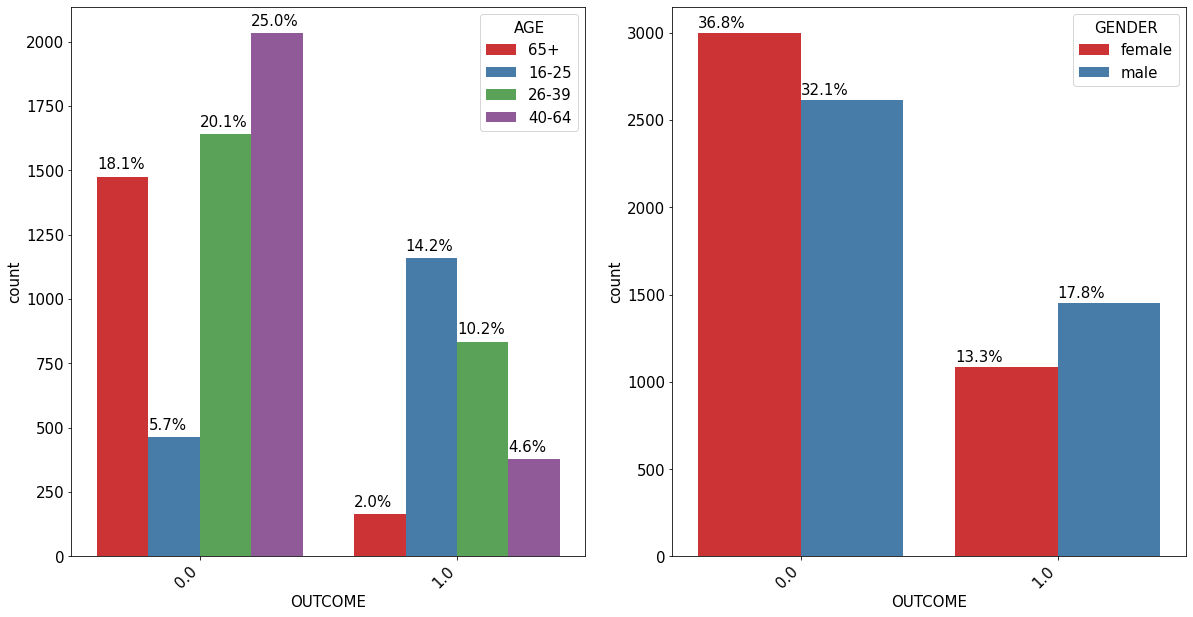

In [ ]:
countplot_with_target(dataFrame, cat_cols[0:2])

>

1. Comment on **AGE**:
  1.  Among the ages groups that we have here, the people in the range **16-25** tend to claim their insurance **more** than the others, while this trend is completely **in reverse** for the people older than **65**. 
  2. Although the range 16-25 was the second to least in the distriibution of the **AGE** it had the most people who claimed for their insurance. 

2. Comment on **GENDER**: 
  1. As we have mentioned above, distribution of **GENDER** was balanced. We can see in the plot that the ratio of the **Males** who claimed their insurance is greater than the **Females**.


### **'DRIVING_EXPRIENCE'** and **'EDUCATION'** distributions

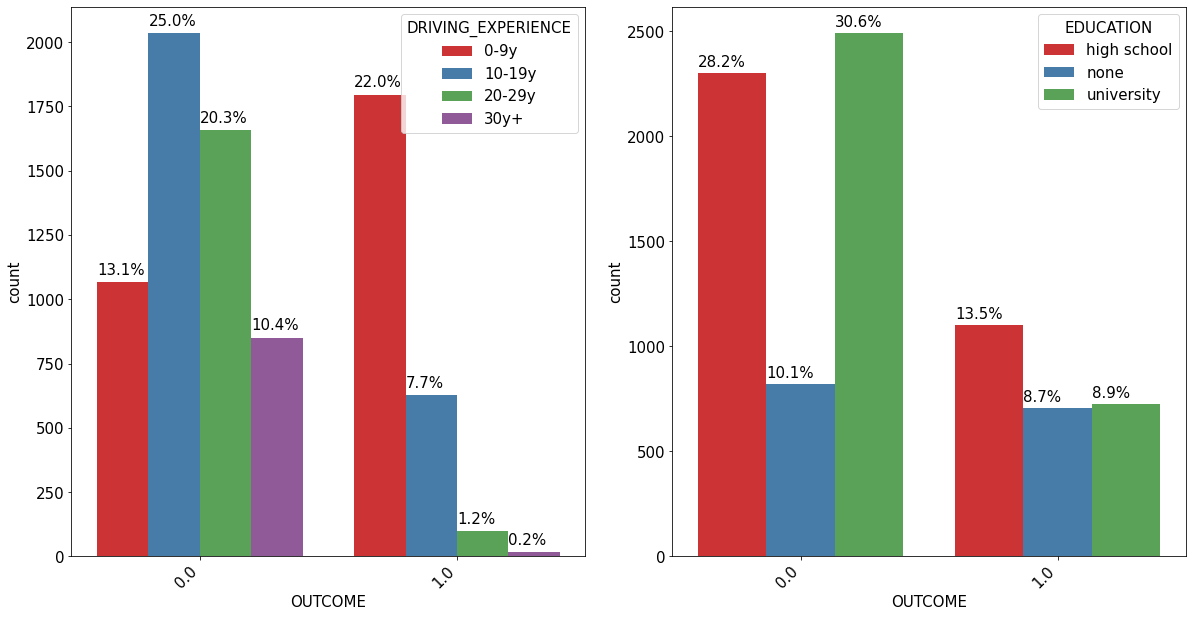

In [ ]:
countplot_with_target(dataFrame, cat_cols[2:4])

1. Comment on **DRIVING_EXPRIENCE**:
  1.  In all groups of the above distribution with different Driving exprience the number of insured people who did not claim their insurance is more than the people who has claimed. Except the group with **0-9y** driving exprience.

  2. In our data set, it seems that the people who have driving experience more than 10 years are less likely to claim their insurance.

  3. The group of insured people who have driving exprience from 0 to 9, have the most tendecy to calim their insurance. Also people who have the driving exprience more than 30 years, have the least claiming, between this distribution. In addition the number of people who have the driving exprience more than 30 years, is less than the other groups in this distribution.




2. Comment on **EDUCATION**: 


  1. In all groups of Education groups, the majority of the people did not claim their insurance.

  2. The distribution of the people who have not any educational qualification is balanced while the distribution of the other groups are unbalanced (the number of the people who did not claim are greater than the people who did).

### '**INCOME'** and **'VEHICLE_YEAR'** distributions

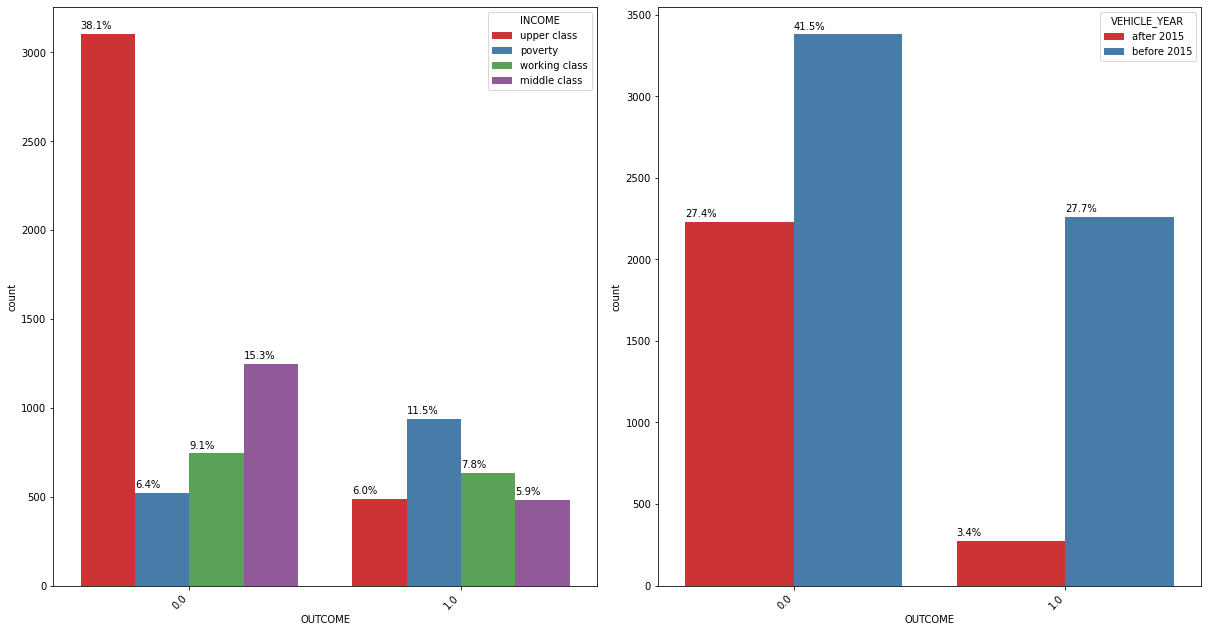

In [ ]:
countplot_with_target(dataFrame, cat_cols[4:6])

1. Comment on **INCOME**:
  1. In all groups of the above distribution with different Income, the number of insured people who did not claim their insurance is more than the people who has claimed. Except the group with **Poverty** situation.
  2. Almost 86% of the upper class people did not claim their insurance.
  
  3. While the group of upper class is forming 44% of our distribution, it has the second least number of people who did not claim their insurance. 

  4. **Poverty** is an important **determinative factor** to claim the insurance. 67% of the people of this group claimed their insurance.


  
2. Comment on **VEHICLE_YEAR**: 

  1.  In both groups of insured people(people who have car before and after 2015) the number of people who calim their insurance is less that who has not calimed.
  2. Among this two group of people, the people who has the car which was produced **before 2015** tend to claim their insurance more than the people who have the car which produced **after 2015**. Also in the distribution of vehicle type the number of people who have the car which was produced **before 2015** is more than the another one.

### '**VEHICLE_TYPE'** and **'RACE'** distributions

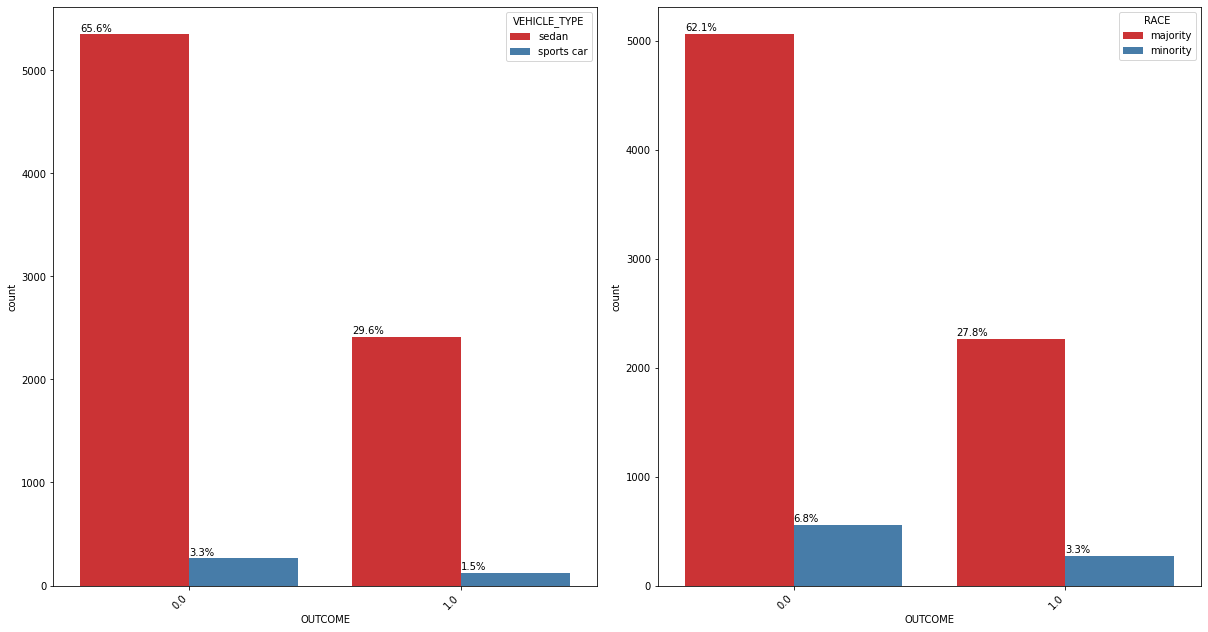

In [ ]:
countplot_with_target(dataFrame, cat_cols[6:8])

1. Comment on **VEHICLE_TYPE**:
  - In both groups of insured people(people who have Sedan or Sport car) the number of people who claimed their insurance is less than who has not claimed.

  
  
2. Comment on **RACE**: 

  - As we can see in the above histogram, in the both groups of insured people(majority, minority) the number of people who claim their insurance is less than the people that did not claim.

3. Comment on **both**:
   Since the distribution of the people who claimed or not claimed w.r.t each possible value of the feature is balanced within these two features, we can say that these two features are not discriminative. In another word, they cannot help us to predict when a new sample comes.

* **NOTE:** We can see that in these two features, **one value doesn't participate much enough** to distinquish between the two classes of our target. We will make a decision about whether having or dropping these features after checking their correlation with the outcome. 

### Binary Numerical Features w.r.t Outcome

Here we will check the distribution of the **binary numerical columns** with respect to the **target values**(**'OUTCOME'**)

Filtering the binary numerical features. 

In [ ]:
binary_num_cols = ['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN']

Then we plot the distribution of such columns with respect to the target value. 

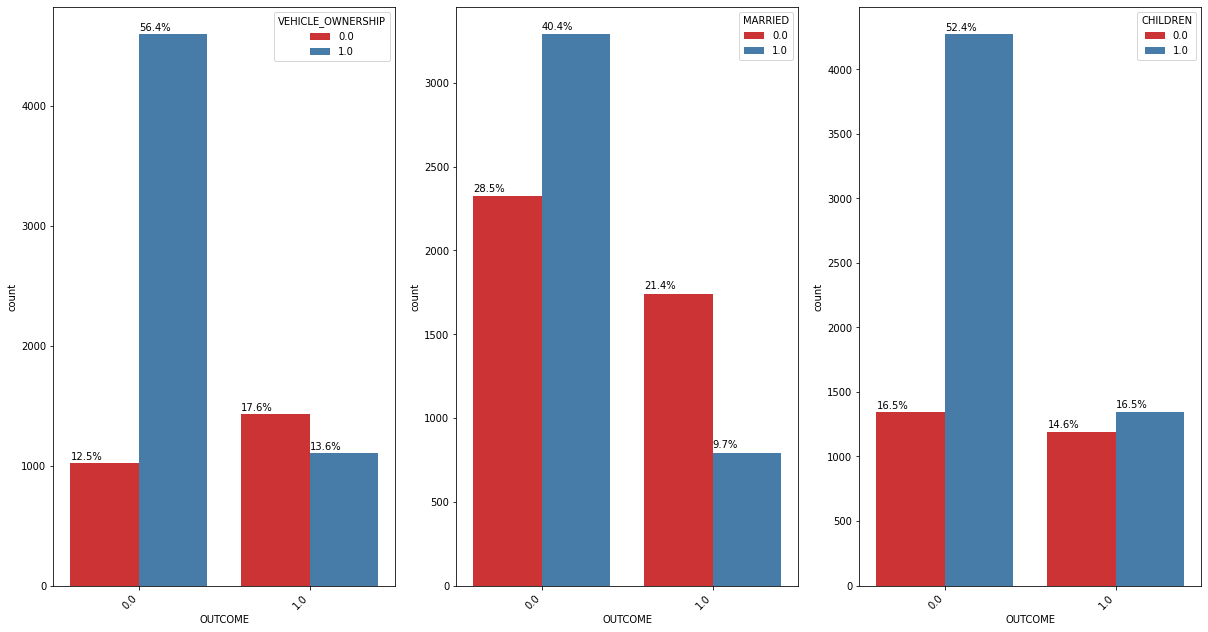

In [ ]:
countplot_with_target(dataFrame, binary_num_cols, 3)

## Correlation Between Features
Checking which features are **correlated** with **each other** and/or the **outcome** variable

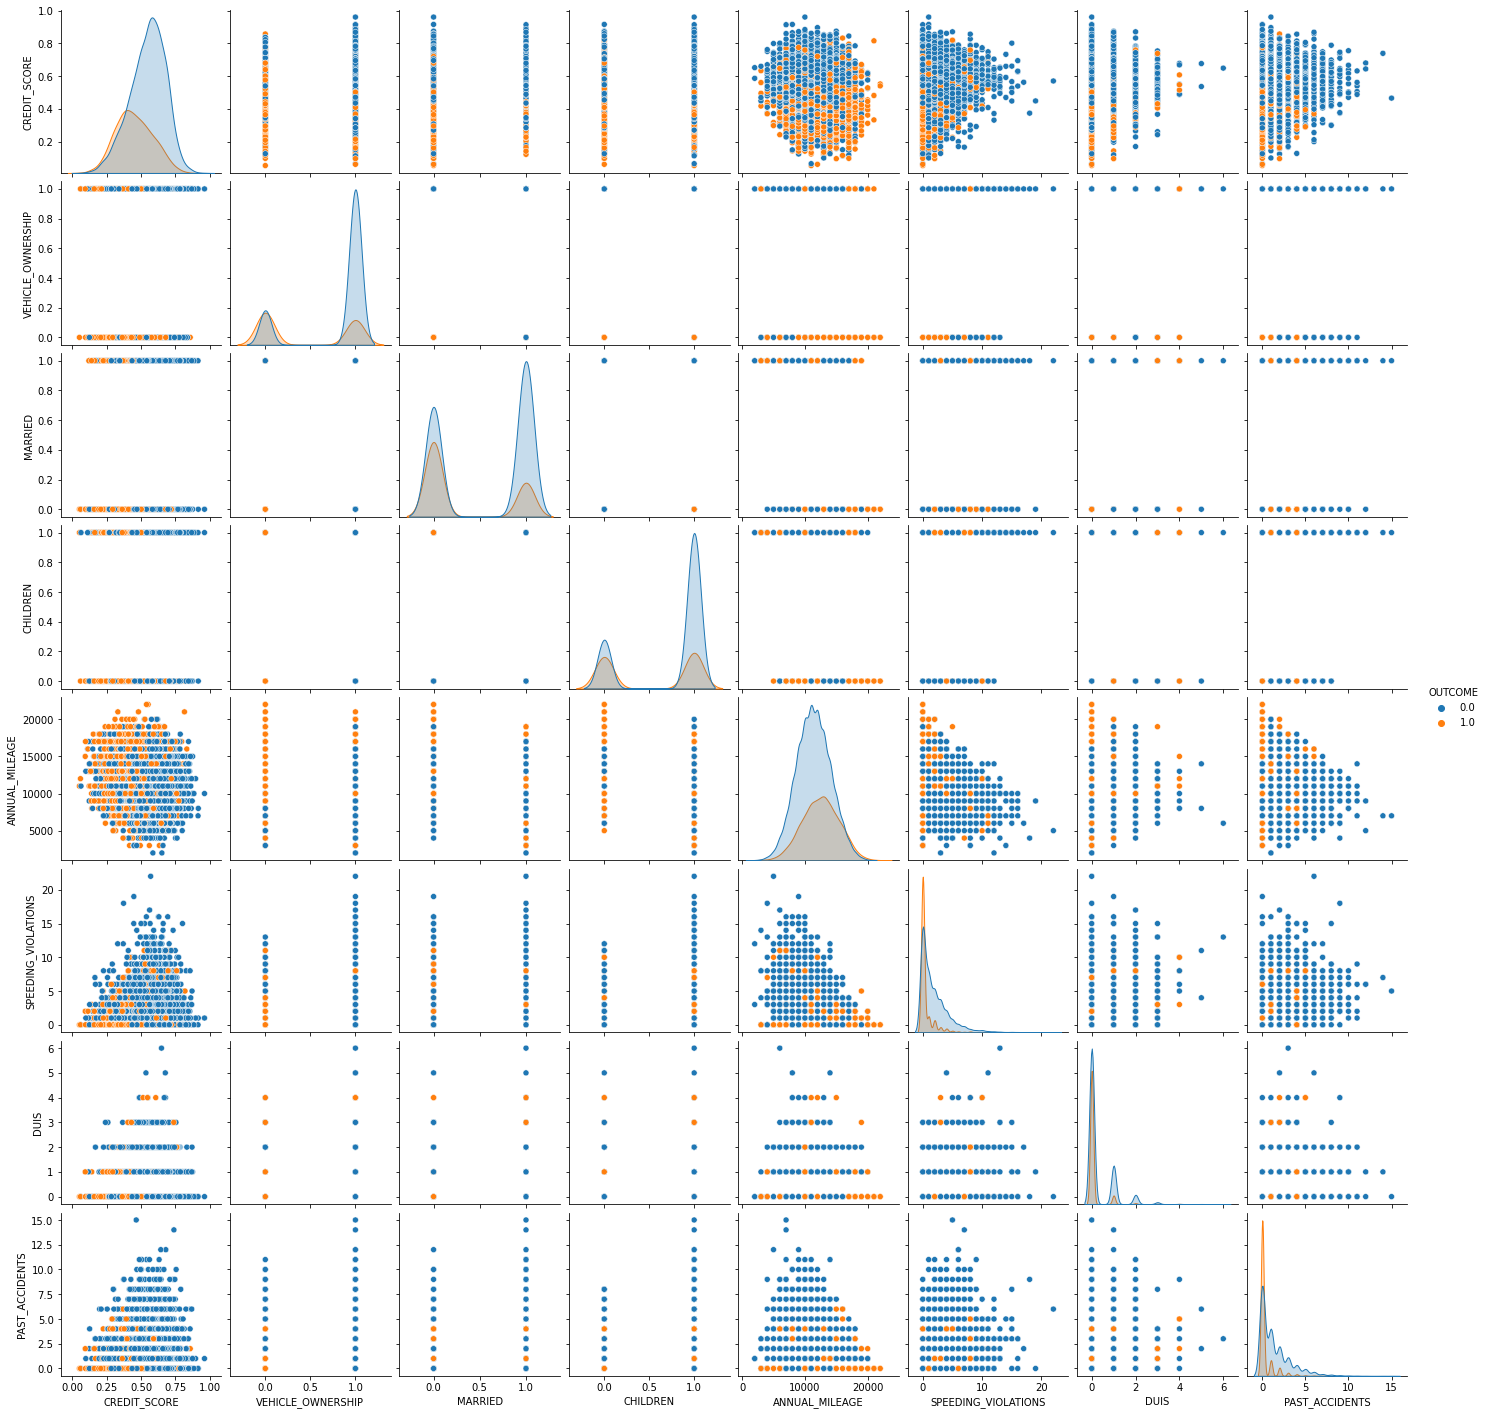

In [ ]:
sn.pairplot(dataFrame, hue='OUTCOME')

Showing the correlation between the **numerical features** using a heatmap. 

* **Note:** We check the correlation between the feature because if **two features are highly correlated** to each other we can **predict one from the other one.**

  So if we can find two features highly correlated, we can **drop one of those features.**

OUTCOME                1.000000
VEHICLE_OWNERSHIP      0.386217
CREDIT_SCORE           0.321436
PAST_ACCIDENTS         0.312738
SPEEDING_VIOLATIONS    0.293138
MARRIED                0.253200
CHILDREN               0.230255
DUIS                   0.190015
ANNUAL_MILEAGE         0.184865
Name: OUTCOME, dtype: float64

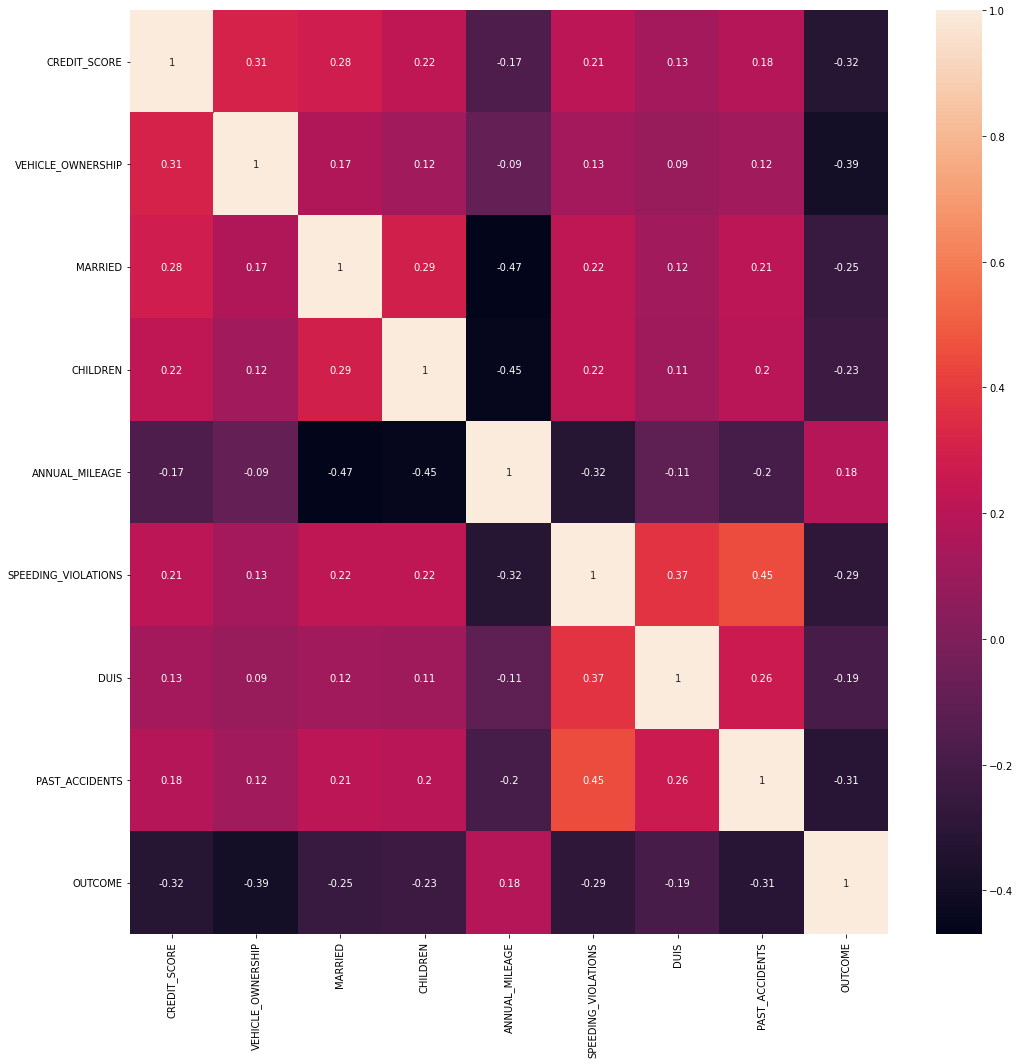

In [ ]:
# This function given the dataset and its target value will produce 
# a heatmap which shows the correlation between each column parwise
# and also the target value. 
def corr(dataframe,target_variable):

    fig, ax = plt.subplots(figsize=(17,17))
    correlation_matrix = dataframe.corr().round(2)
    sn.heatmap(data=correlation_matrix, annot=True)
    
    correlation = dataFrame.corr()[target_variable].abs().sort_values(ascending = False)
    return correlation
    
corr(dataFrame,"OUTCOME")

We can interpret these numbers in this way: 
1. **Strong correlation**: If the correlation degree lies between **± 0.50 and ± 1**
2. **Medium correlation**: If the correlation degree lies between **± 0.30 and ± 0.49**
2. **Small correlation**: If the correlation degree lies between **± 0.29 and 0**

* **Observations:**
  1. As we can see in the feature above, we don't have two features that are highly correlated to each other. (**we can not drop some of the features**)
  2. As there is not high correlation between features and outcome pairwise, we can assume that **our features are indepentent**.
  3. The highest correlation is between **'ANNUAL_MILEAGE'** and **'MARRIED'** by degree -0.47. 
  4. The feature **'VEHICLE_OWNERSHIP'** has the highest correlation with **'OUTCOME'** among all the features. 
  

## Checking The Outliers
 ---
 Before passing our data to Machine Learning algorithms we should make sure:

1.   Our data does not have any outliers.
2.   Our data is not highly skewed.
3.   There is no multicollinearity in our data.


We will take a look at the boxplot of all our features in the dataset to check if there are some outliers in each of these columns or not. 

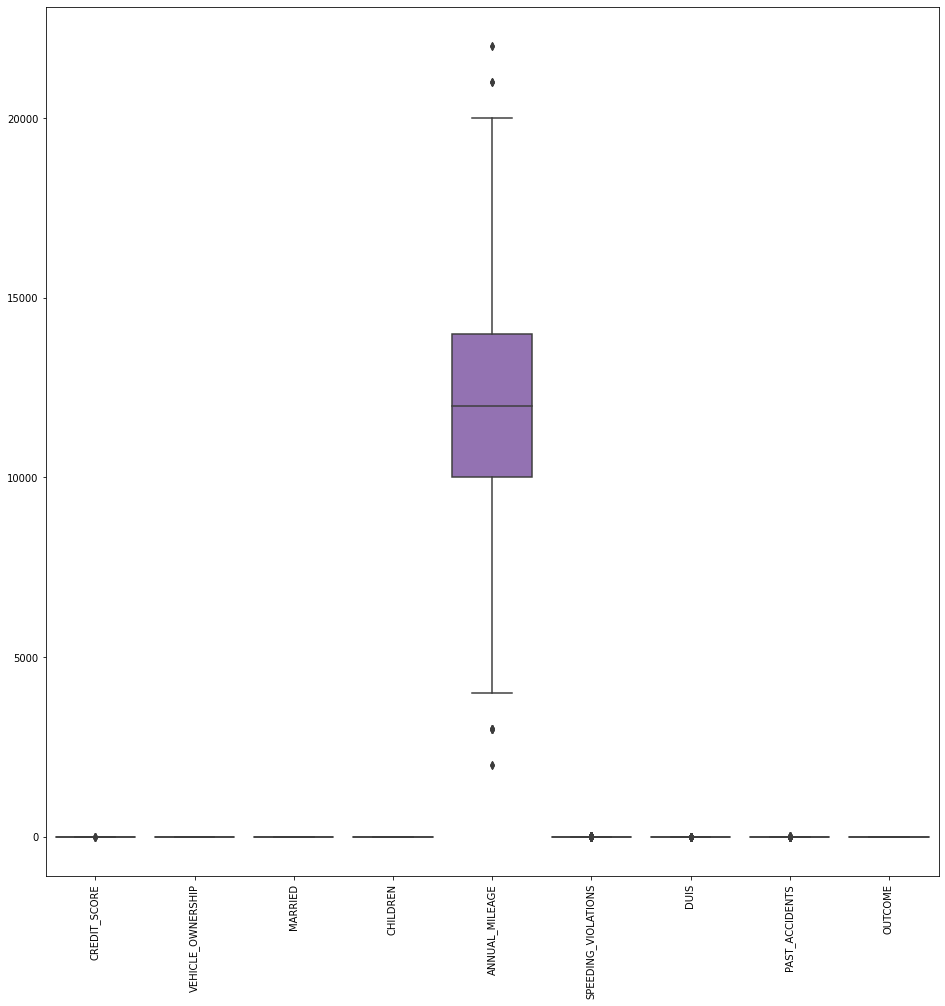

In [ ]:
# To check for outliers, we are plotting a box-whisker plot.
plt.figure(figsize=(16,16), facecolor='w')
sn.boxplot(data=dataFrame)
plt.xticks(rotation = 90)
plt.show()

As we can see in the figure above these features are contaning outliers: 
1. **'CREDIT_SCORE'**
2. **'ANNUAL_MILEAGE'**
3. **'SPEEDING_VIOLATIONS'**
4. **'DUIS'**
5. **'PAST_ACCIDENTS'**

Here we wrote some function to help us to find the outliers of each of the columns. 

In [ ]:
# This function given a dataset and a column will return 
# the lower bound and upper bound of the values in that column

# The values that are not in this bound will be considered as outliers

#length of whiskers in a box plot:
#The whiskers indicate the largest/lowest points inside the range defined by 1st or 3rd quartile plus 1.5 times IQR. 
#The upper whisker is the largest observation that is <= 3rd quartile + 1.5 * iqr
#The lower whisker is the smallest observation that is => 1rd quartile - 1.5 * iqr
def outlier_bound(data, column):
  q1= np.percentile(data[column], 25)
  q3= np.percentile(data[column], 75)
  iqr=q3-q1
  upper_whisker = q3 + 1.5*(iqr)
  lower_whisker = q1 - 1.5*(iqr)
 
  return [round(lower_whisker, 2), round(upper_whisker, 2)] 

# This function given a dataset and a column in that dataset will return 
# the records that have outliers in that column 
def outliers_info(data, column):

  lower_whisker, upper_whisker = outlier_bound(data, column)
  print(f"Lower-bound: \'{lower_whisker}\', Upper-bound: \'{upper_whisker}\'")
  print('-'*30)
  outliers = data[(data[column]<lower_whisker) | (data[column]>upper_whisker) ] 
  print(f'Number of outliers in \'{column}\' Column is : \'{len(outliers)}\' \n\n')
  return outliers

### **'ANNUAL_MILEAGE'**

We will take a look at the outliers in **'ANNUAL_MILEAGE'** column. 

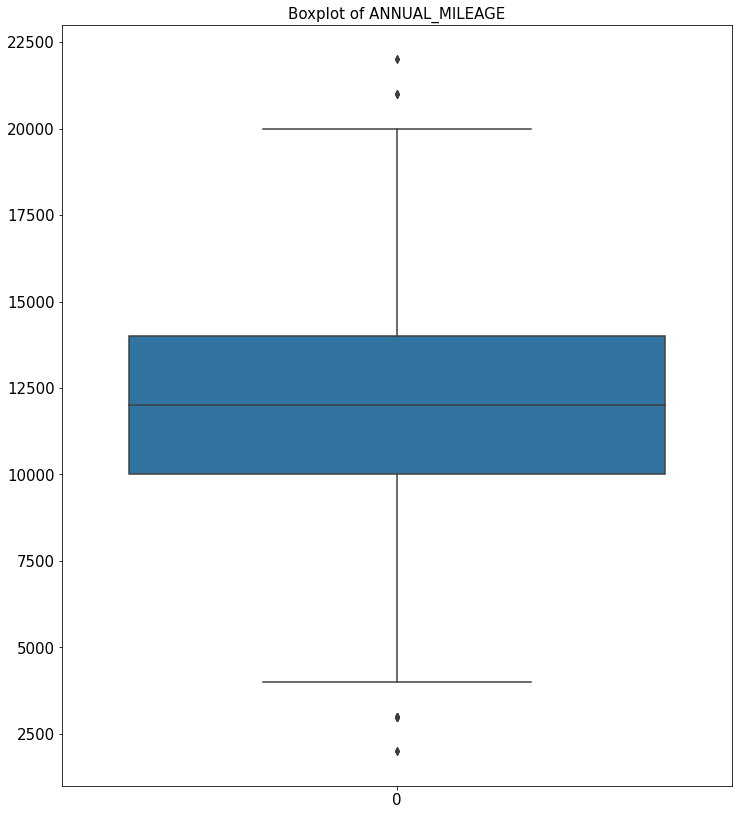

In [ ]:
# To check for outliers, we are plotting a box-whisker plot.
plt.figure(figsize=(12,14), facecolor='w')
plt.title('Boxplot of ANNUAL_MILEAGE', fontsize = 15)
sn.boxplot(data=dataFrame['ANNUAL_MILEAGE'])

Here we will show the records that have outliers in this column. 

In [ ]:
outliers_info(dataFrame, 'ANNUAL_MILEAGE')

Lower-bound: '4000.0', Upper-bound: '20000.0'
------------------------------
Number of outliers in 'ANNUAL_MILEAGE' Column is : '16' 




,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
1593,26-39,female,minority,0-9y,high school,upper class,0.633158,1.0,before 2015,1.0,1.0,3000.0,sedan,0,0,0,1.0
2607,65+,male,majority,30y+,university,upper class,0.651709,1.0,after 2015,1.0,1.0,2000.0,sedan,12,0,1,0.0
3712,16-25,female,majority,0-9y,none,poverty,0.494878,0.0,before 2015,1.0,1.0,3000.0,sedan,0,0,0,1.0
3862,26-39,female,majority,0-9y,high school,middle class,0.417037,0.0,before 2015,1.0,1.0,3000.0,sedan,0,0,0,1.0
4401,40-64,male,majority,10-19y,university,upper class,0.815511,1.0,before 2015,0.0,0.0,21000.0,sedan,0,0,0,1.0
4419,26-39,male,majority,0-9y,university,upper class,0.446658,1.0,before 2015,1.0,1.0,3000.0,sedan,0,0,0,0.0
4775,40-64,male,majority,20-29y,university,poverty,0.450470,0.0,before 2015,1.0,1.0,3000.0,sedan,8,1,3,0.0
4984,65+,female,majority,20-29y,high school,upper class,0.449297,1.0,after 2015,1.0,1.0,3000.0,sedan,8,0,2,0.0
5015,65+,male,majority,30y+,university,upper class,0.659756,1.0,before 2015,1.0,1.0,3000.0,sedan,14,0,3,0.0
5153,16-25,male,majority,0-9y,none,poverty,0.481490,0.0,before 2015,0.0,0.0,21000.0,sedan,0,0,0,1.0


### **'CREDIT_SCORE'**

We will take a look at the outliers in **'CREDIT_SCORE'** column. 

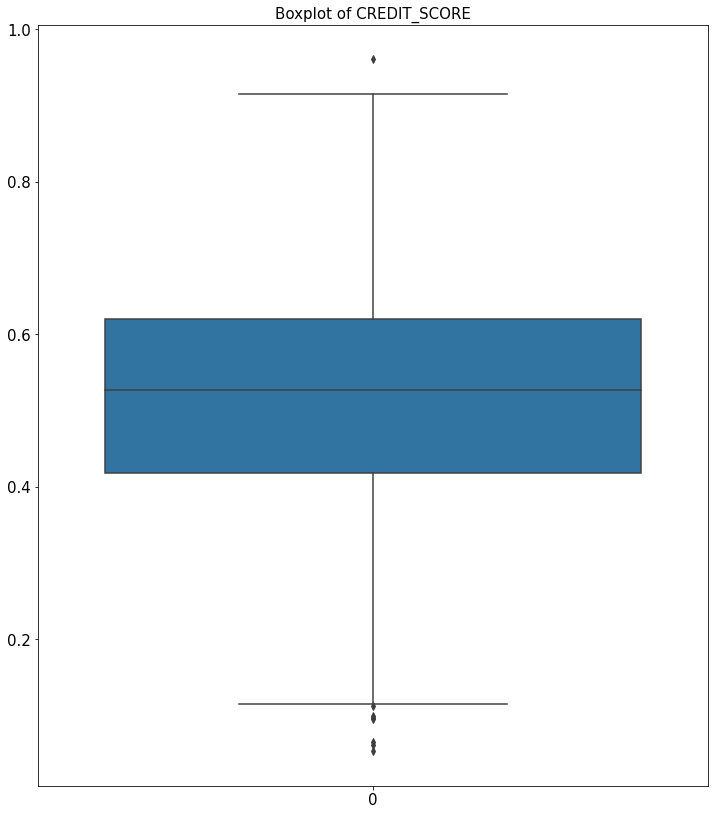

In [ ]:
plt.figure(figsize=(12,14))
plt.title('Boxplot of CREDIT_SCORE', fontsize = 15)
sn.boxplot(data=dataFrame['CREDIT_SCORE'])

Here we will show the records that have outliers in this column. 

In [ ]:
outliers_info(dataFrame, 'CREDIT_SCORE')

Lower-bound: '0.11', Upper-bound: '0.92'
------------------------------
Number of outliers in 'CREDIT_SCORE' Column is : '7' 




,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
2152,16-25,female,majority,0-9y,none,poverty,0.053358,0.0,before 2015,0.0,1.0,11000.0,sedan,0,0,0,1.0
4955,16-25,male,majority,0-9y,none,poverty,0.064810,1.0,before 2015,0.0,1.0,11000.0,sedan,0,0,0,0.0
6031,16-25,male,majority,0-9y,high school,poverty,0.060867,1.0,before 2015,0.0,0.0,12000.0,sedan,0,0,0,1.0
6752,26-39,female,majority,10-19y,high school,poverty,0.099655,1.0,after 2015,0.0,0.0,13000.0,sedan,1,0,1,0.0
8039,26-39,male,majority,10-19y,none,poverty,0.095387,1.0,before 2015,0.0,0.0,15000.0,sedan,2,1,2,1.0
8057,40-64,male,majority,10-19y,university,upper class,0.960819,1.0,after 2015,0.0,1.0,10000.0,sedan,1,0,1,0.0
8194,16-25,male,majority,0-9y,none,poverty,0.097211,0.0,before 2015,0.0,0.0,17000.0,sedan,0,0,0,1.0


### **'SPEEDING_VIOLATIONS'**

We will take a look at the outliers in **'SPEEDING_VIOLATIONS'** column. 

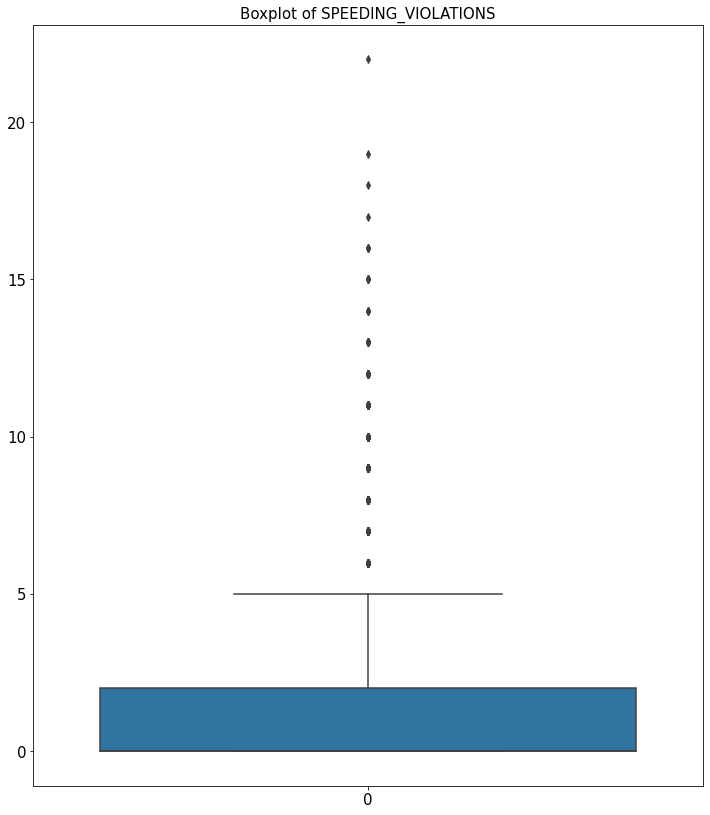

In [ ]:
plt.figure(figsize=(12,14))
plt.title('Boxplot of SPEEDING_VIOLATIONS', fontsize = 15)
sn.boxplot(data=dataFrame['SPEEDING_VIOLATIONS'])

Here we will show the records that have outliers in this column. 


In [ ]:
outliers_info(dataFrame, 'SPEEDING_VIOLATIONS')

Lower-bound: '-3.0', Upper-bound: '5.0'
------------------------------
Number of outliers in 'SPEEDING_VIOLATIONS' Column is : '493' 




,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
6,65+,male,majority,30y+,high school,upper class,0.492944,0.0,after 2015,1.0,1.0,13000.0,sedan,7,0,3,0.0
10,65+,male,majority,30y+,high school,upper class,0.620361,1.0,after 2015,1.0,1.0,10000.0,sedan,6,2,7,0.0
24,65+,male,majority,30y+,high school,upper class,0.500631,1.0,before 2015,1.0,1.0,7000.0,sedan,13,2,3,0.0
42,40-64,male,majority,20-29y,university,upper class,0.587384,0.0,after 2015,1.0,1.0,9000.0,sedan,10,2,0,0.0
46,65+,male,majority,20-29y,high school,upper class,0.625626,1.0,after 2015,1.0,1.0,7000.0,sedan,7,0,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9929,65+,female,majority,30y+,university,upper class,0.765637,1.0,before 2015,1.0,1.0,6000.0,sedan,6,0,1,0.0
9934,40-64,male,minority,20-29y,university,upper class,0.593103,1.0,before 2015,0.0,1.0,6000.0,sedan,12,0,2,0.0
9943,65+,male,majority,30y+,university,upper class,0.469432,1.0,after 2015,1.0,1.0,7000.0,sports car,14,0,5,0.0
9961,26-39,male,majority,10-19y,university,upper class,0.547368,1.0,before 2015,1.0,0.0,11000.0,sedan,7,1,0,0.0


### **'PAST_ACCIDENTS'**

We will take a look at the outliers in **'PAST_ACCIDENTS'** column. 

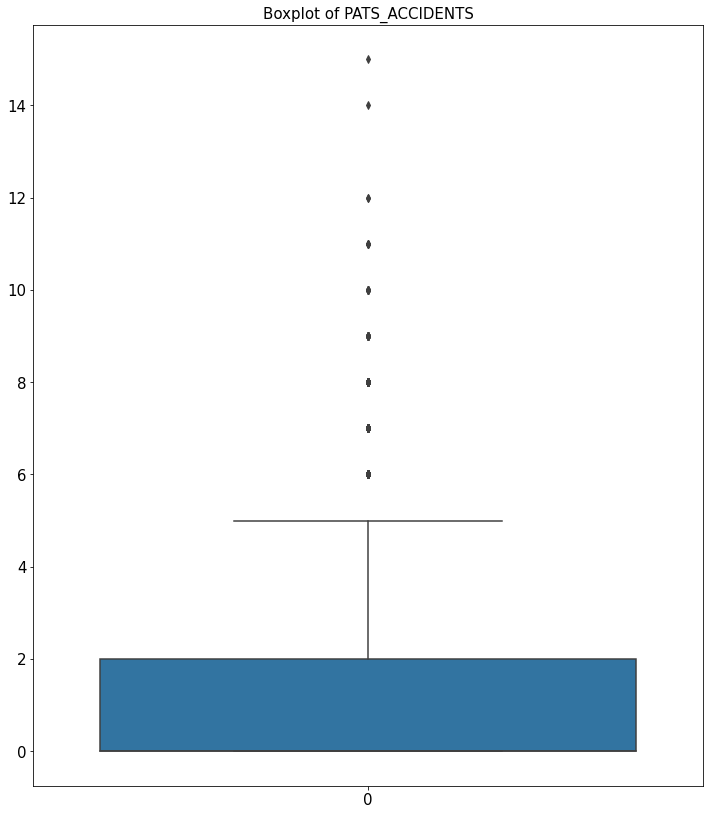

In [ ]:
plt.figure(figsize=(12,14))
plt.title('Boxplot of PATS_ACCIDENTS', fontsize = 15)
sn.boxplot(data=dataFrame['PAST_ACCIDENTS'])

Here we will show the records that have outliers in this column. 


In [ ]:
outliers_info(dataFrame, 'PAST_ACCIDENTS')

Lower-bound: '-3.0', Upper-bound: '5.0'
------------------------------
Number of outliers in 'PAST_ACCIDENTS' Column is : '231' 




,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
10,65+,male,majority,30y+,high school,upper class,0.620361,1.0,after 2015,1.0,1.0,10000.0,sedan,6,2,7,0.0
70,65+,male,majority,20-29y,high school,upper class,0.597991,0.0,before 2015,1.0,1.0,12000.0,sedan,2,1,7,1.0
87,40-64,male,majority,20-29y,high school,working class,0.387107,0.0,before 2015,0.0,1.0,16000.0,sedan,0,0,6,0.0
91,40-64,male,majority,20-29y,university,upper class,0.602656,1.0,after 2015,1.0,1.0,7000.0,sedan,4,0,6,0.0
122,65+,male,majority,20-29y,none,working class,0.426828,1.0,before 2015,1.0,0.0,14000.0,sedan,3,1,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9694,65+,female,majority,30y+,high school,upper class,0.622990,0.0,before 2015,1.0,1.0,7000.0,sedan,2,0,8,0.0
9752,65+,male,majority,30y+,university,upper class,0.868213,1.0,after 2015,1.0,1.0,12000.0,sedan,3,1,6,0.0
9904,65+,male,majority,30y+,university,upper class,0.610006,1.0,after 2015,1.0,1.0,13000.0,sedan,4,1,6,0.0
9919,40-64,female,majority,20-29y,university,upper class,0.469942,1.0,before 2015,1.0,1.0,12000.0,sedan,2,0,6,0.0


**Observation:**<br>
From the generated boxplots we can conclude:
- We have outliers in the following columns: **'ANNUAL_MILEAGE'**, **'PAST_ACCIDENTS'**, **'SPEEDING_VIOLATIONS'**, **'CREDIT_SCORE'**.

We have two most used approaches to handle the outliers: 
1. **Removing** the records that are containing outliers. <br/>
2. **Winsorization** which tries to set the outliers to the nearest value bounds. 

Our approach would be a combination of the first approach and discretization of the continous features 

# 3. Feature Engineering

Feature engineering refers to a process of selecting and transforming features in our dataset when creating a predictive model using machine learning.

Therefore, we have to extract the features from the __raw dataset__  that we have. Otherwise, it will be hard to gain good insights in our dataset. 
There would be some strategies to apply.

## Dropping useless features
As we **mentioned in the data exploration** section these two features **(RACE, VEHICLE_TYPE)**, don't participate much enough to distinquish between the two classes of our target. <br/>
Moreover, after checking their correlation with the outcome, there wasn't high correlation between them.

Therefore, we can safely drop these two features.

In [ ]:
dataFrame = dataFrame.drop(['RACE','VEHICLE_TYPE'],axis = 1)

Check if these two columns were deleted or not. 

In [ ]:
dataFrame.head()

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,12000.0,0,0,0,0.0
1,16-25,male,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,16000.0,0,0,0,1.0
2,16-25,female,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,11000.0,0,0,0,0.0
3,16-25,male,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,11000.0,0,0,0,0.0
4,26-39,male,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,12000.0,2,0,1,1.0


### Checking For Balancing
---

Here we will check if the dataset is balanced or not. 

In [ ]:
dataFrame.OUTCOME.value_counts()

0.0    5613
1.0    2536
Name: OUTCOME, dtype: int64

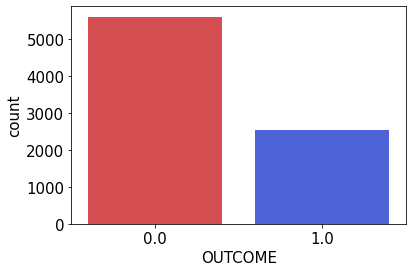

In [ ]:
sn.countplot(x='OUTCOME',data=dataFrame,palette=["#eb383b","#3853eb"])

* **Note:** 
 As it can be seen from the figure above, our target feature seems to be balanced. Without having a balanced dataset, using simpler metrics like accuracy_score can be misleading. 

We define weights for each of the target values in order to consider the datasets as completely balanced. 


In [ ]:
w0=dataFrame.shape[0] / (2 * dataFrame.OUTCOME.value_counts()[0])
w1=dataFrame.shape[0] / (2 * dataFrame.OUTCOME.value_counts()[1])
print(w0, w1)

0.725904151077855 1.6066640378548895


* **Note:** these weights will be used when we want to train our Logistic Regression. 

# 4. Learning and Model Selection

A Machine Learning pipeline is a way to automate the workflow that takes to produce a Machine Learning model. Machine learning pipelines consist of multiple sequential steps that do everything from data extraction and preprocessing to model training and deployment.

For any Machine Learning task, testing is an important phase to realize how good our predictive model is. As we do not have any separate testing dataset we need to use some dataset entries to perform the evaluation task.

The way in which we use different methods to train our model is in the following:

For __Logistic Regression__
- Train a model using training set
- Analyse the model performance on `training set`
- Analyse the model performance on `test set`
- Perform __hyperparameter tuning__ to find the best model using different paragemters
- Analyse the `best model` outcome of hp-tuning method and cross_validation on training set
- Analyse the `best model` outcome of hp-tuning method and cross_validation on test set

* **Note:** Since we do not have a separate test set to evaluate the performance of our models, we should split our data set into train and test subsets.

In [ ]:
# Separating target feature from the dataset. 
y = dataFrame['OUTCOME']
X = dataFrame.drop(columns=['OUTCOME'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
import random


# divide train test: 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 21)

In this part, we will perform two models : 

  -   [1. Logistic Regression](#LR)
  -   [2. Naive Bayes](#NB)

But before we need to define some functions for our pipeline. 

## Handle Outliers

This function given a dataset will **remove** the outliers from all the numerical columns.

In [ ]:
num_cols = [col for col in dataFrame.columns if dataFrame[col].dtypes != "O"]
num_cols.remove('OUTCOME')

In [ ]:
def outlier_removal(df):

  # For each numerical columns
  for column in num_cols:

    # Take the upper bound and the lower bound of the values 
    lower, upper = outlier_bound(df, column)

    # Filter the index of the records that are containing outliers in this column
    lower_indices = list((df[df[column] <lower]).index)
    upper_indices = list((df[df[column] >upper]).index)

    # Drop the outliers
    df = df.drop(lower_indices + upper_indices)
  
  return df

This function given a dataset, tries to **winsorize** the outliers in the numerical columns. 

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from scipy.stats.mstats import winsorize

# insorizing is a technique to deal with outliers and is named after Charles Winsor. In effect, Winsorization clips outliers to given percentiles in a symmetric fashion. For instance, we can clip to the 5th and 95th percentile. SciPy has a winsorize() function, which performs this procedure.
def outlier_winsorization(df):

  for column in num_cols:
    lower, upper = outlier_bound(df, column)

    limit_lower = df[(df[column] < lower)].shape[0] / df.shape[0]
    limit_upper = df[(df[column] > upper)].shape[0] / df.shape[0]

    df[column] = winsorize(df[column], limits=[limit_lower, limit_upper])
  
  return df

## Handle categorical Features

In [ ]:
categorical_cols = ['AGE', 'GENDER','DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR']

This function given a dataset, and columns turn the categorical values into the numerical one hot values. 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def encoding(encoder, df, columns):
    df.reset_index(drop=True, inplace=True)

    for col_ in columns:
        encoder.fit(df[[col_]])

        encoded_col = pd.DataFrame(data=encoder.transform(df[[col_]]).toarray())
        encoded_col = encoded_col.add_prefix(f'{col_}_')
        
        df.drop(col_, axis=1, inplace=True)
        df = df.join(encoded_col, how='inner')

    return encoder, df

## Method I: Logistic Regression<font><a name=LR></a>

### LR: Pipleline and Prediction

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

encoder = OneHotEncoder(handle_unknown='ignore')
pipeline = Pipeline(steps=[
                           ('outlier', FunctionTransformer(outlier_winsorization)) ,
                           ('scaler',MaxAbsScaler()), 
                           ('model', LogisticRegression())
                           ])
encoder, X_train = encoding(encoder, X_train, categorical_cols)

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('outlier',
                 FunctionTransformer(func=<function outlier_winsorization at 0x7f3bb514f050>)),
                ('scaler', MaxAbsScaler()), ('model', LogisticRegression())])

In [ ]:
_, X_test = encoding(encoder, X_test, categorical_cols)

In [ ]:
y_pred_lr = pipeline.predict(X_test)

### LR: Confusion Matrix and performance report

Text(0.5, 1.0, 'Confusion matrix Logistic Regression\n')

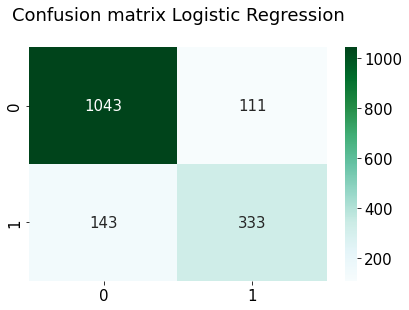

In [ ]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_LR = confusion_matrix(y_test,y_pred_lr)
sn.heatmap(confusion_matrix_LR, annot=True,cmap="BuGn" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      1154
         1.0       0.75      0.70      0.72       476

    accuracy                           0.84      1630
   macro avg       0.81      0.80      0.81      1630
weighted avg       0.84      0.84      0.84      1630



In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_lr)

0.8016963284447227

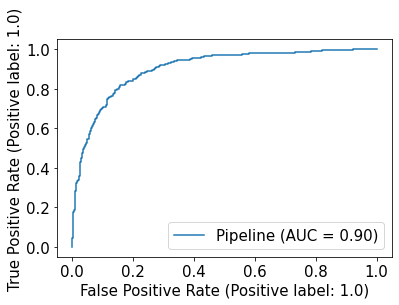

In [ ]:
metrics.plot_roc_curve(pipeline, X_test, y_test) 
plt.show()

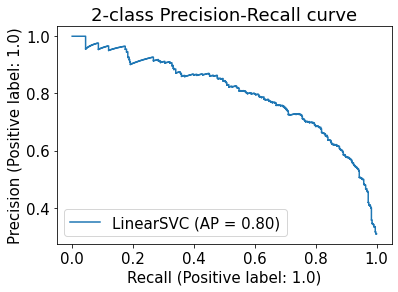

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    pipeline, X_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

The weights given to each of the features by **Linear Logistic Regression.**

In [ ]:
coefs = pipeline['model'].coef_.flatten()
columns = list(X_train.columns)

for i in range(8):
    print((coefs[i] , columns[i])) 

(0.18519641730166253, 'CREDIT_SCORE')
(-1.7448612565481116, 'VEHICLE_OWNERSHIP')
(-0.3745908998895585, 'MARRIED')
(-0.15445245908485117, 'CHILDREN')
(1.0556338260834932, 'ANNUAL_MILEAGE')
(0.353777156975079, 'SPEEDING_VIOLATIONS')
(0.0, 'DUIS')
(-1.0960768290203768, 'PAST_ACCIDENTS')


### LR: Hyperparameter Tuning

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


'''
C: regularization parameter: 
penalty: tradeoff parameter: to weight regulatization penalties
 - C=0 => no regularization at all
 - C>0 and alpha=1 L1-regularization only => penalty = 'l1' 
 - C>0 and alpha=0 L2-regularization only => penalty = 'l2'

solver: Algorithm to use in the optimization problem. 
 - small datasets => ‘liblinear’
 - large datasets => ‘sag’ and ‘saga’

summarized from this link and sckit-learn official website.
https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions

fit_intercept: Intercept (a.k.a. bias) added to the decision function.
max_iter: Maximum number of iterations taken for the solvers to converge.

'''

params = {
   'model__C': np.logspace(-4, 4, 6),
   'model__penalty': ['none', 'l1', 'l2', 'elasticnet'],
   'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
   'model__class_weight': ['balanced', {1:w1, 0:w0}, {1:1.5, 0:1}],
   'model__fit_intercept': [True, False],
   'model__max_iter': [100, 200, 500],
  }

hp_tuning = GridSearchCV(pipeline, params, scoring='accuracy', cv=5)
hp_tuning.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % hp_tuning.best_score_)
print(hp_tuning.best_params_)

Best parameter (CV score=0.838):
{'model__C': 6.309573444801943, 'model__class_weight': {1: 1.6066640378548895, 0: 0.725904151077855}, 'model__fit_intercept': True, 'model__max_iter': 100, 'model__penalty': 'l1', 'model__solver': 'liblinear'}


In [ ]:
report = pd.DataFrame(columns=['C', 'penalty', 'solver', 'class_weight', 'fit_intercept', 'max_iter', 'score'])

for mean, params in zip(hp_tuning.cv_results_['mean_test_score'], hp_tuning.cv_results_['params']):
  report=report.append({
      'C'            : params['model__C'],
      'penalty'      : params['model__penalty'],
      'solver'       : params['model__solver'],
      'class_weight' : params['model__class_weight'],
      'fit_intercept': params['model__fit_intercept'],
      'max_iter'     : params['model__max_iter'],
      'score'        : mean
  }, ignore_index=True)

report = report.sort_values(by = "score", ascending=False)
report

,C,penalty,solver,class_weight,fit_intercept,max_iter,score
1247,6.309573,l1,liblinear,"{1: 1.6066640378548895, 0: 0.725904151077855}",True,500,0.837553
1207,6.309573,l1,liblinear,"{1: 1.6066640378548895, 0: 0.725904151077855}",True,100,0.837553
1227,6.309573,l1,liblinear,"{1: 1.6066640378548895, 0: 0.725904151077855}",True,200,0.837553
1087,6.309573,l1,liblinear,balanced,True,100,0.837553
1147,6.309573,l1,liblinear,balanced,False,100,0.837553
...,...,...,...,...,...,...,...
2155,10000.000000,elasticnet,newton-cg,"{1: 1.5, 0: 1}",False,500,NaN
2156,10000.000000,elasticnet,lbfgs,"{1: 1.5, 0: 1}",False,500,NaN
2157,10000.000000,elasticnet,liblinear,"{1: 1.5, 0: 1}",False,500,NaN
2158,10000.000000,elasticnet,sag,"{1: 1.5, 0: 1}",False,500,NaN


### LR: Detailed Classification report

In [ ]:
print("_________________Detailed classification report_________________\n")
print("The model is trained on the development set.")
print("The scores are computed on the evaluation set.\n")

print("Let See the result on the Test set\n")

y_pred = hp_tuning.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))


_________________Detailed classification report_________________

The model is trained on the development set.
The scores are computed on the evaluation set.

Let See the result on the Test set

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      1154
         1.0       0.72      0.72      0.72       476

    accuracy                           0.84      1630
   macro avg       0.81      0.81      0.81      1630
weighted avg       0.84      0.84      0.84      1630



### LR: Check Generalization
We are going to check the generalization of the best model using K-Fold Cross validation to ensure that our best model performs well on the real data as like as our test set.

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_score


encoder = OneHotEncoder(handle_unknown='ignore')
model = hp_tuning.best_estimator_
pipeline = Pipeline(steps=[
                           ('outlier', FunctionTransformer(outlier_winsorization)) ,
                           ('encoder', encoder),
                           ('scaler',MaxAbsScaler()), 
                           ('model', model)
                           ])
print('Accuracy on each fold: ')
cross_val_score(pipeline, X, y, cv=5)

Accuracy on each fold: 


array([0.84539877, 0.84907975, 0.82515337, 0.84785276, 0.83425414])

__Our model is well generalized to unseen data__

## Method II: Naive Bayes<font><a name=NB></a>

### NB: Pipleline and Prediction

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

pipeline = Pipeline(steps=[
                           ('outlier', FunctionTransformer(outlier_winsorization)) ,
                           ('model', BernoulliNB())
                           ])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('outlier',
                 FunctionTransformer(func=<function outlier_winsorization at 0x7f3bb514f050>)),
                ('model', BernoulliNB())])

In [ ]:
y_pred_nb = pipeline.predict(X_test)

### NB: Confusion Matrix and performance report

Text(0.5, 1.0, 'Confusion matrix Naive Bayes\n')

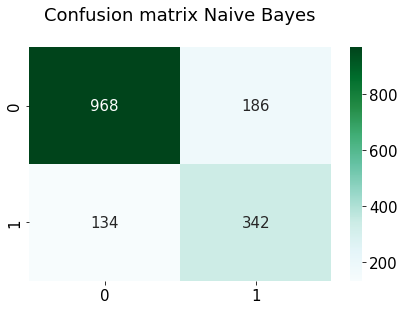

In [ ]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_LR = confusion_matrix(y_test,y_pred_nb)
sn.heatmap(confusion_matrix_LR, annot=True,cmap="BuGn" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix Naive Bayes\n')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      1154
         1.0       0.65      0.72      0.68       476

    accuracy                           0.80      1630
   macro avg       0.76      0.78      0.77      1630
weighted avg       0.81      0.80      0.81      1630



In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_nb)

0.7786544427129605

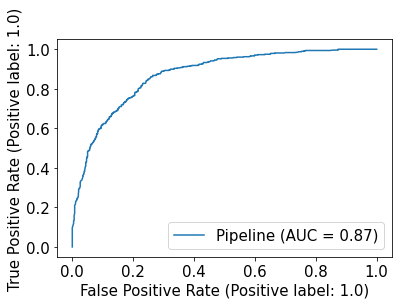

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
metrics.plot_roc_curve(pipeline, X_test, y_test) 

plt.show()


## Complexity
We are going to increase the degree of the polynamial of our Logistic Regression model to check if the result will be improved or not. 

### Degree 2:

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

pipeline = Pipeline(steps=[
                           ('outlier', FunctionTransformer(outlier_winsorization)) ,
                           ('scaler',MaxAbsScaler()), 
                           ('poly' , poly),
                           ('model', LogisticRegression())
                           ])

In [ ]:
pipeline.fit(X_train, y_train) 

Pipeline(steps=[('outlier',
                 FunctionTransformer(func=<function outlier_winsorization at 0x7f3bb514f050>)),
                ('scaler', MaxAbsScaler()), ('poly', PolynomialFeatures()),
                ('model', LogisticRegression())])

In [ ]:
y_pred_lr_degree2 = pipeline.predict(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_lr_degree2))

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      1154
         1.0       0.74      0.70      0.72       476

    accuracy                           0.84      1630
   macro avg       0.81      0.80      0.80      1630
weighted avg       0.84      0.84      0.84      1630



The number of difference combinations of our features/coefficients.

In [ ]:
len(pipeline['model'].coef_.flatten())

406

### Degree 3: 

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)

pipeline = Pipeline(steps=[
                           ('outlier', FunctionTransformer(outlier_winsorization)) ,
                           ('scaler',MaxAbsScaler()), 
                           ('poly' , poly),
                           ('model', LogisticRegression())
                           ])

In [ ]:
pipeline.fit(X_train, y_train) 

Pipeline(steps=[('outlier',
                 FunctionTransformer(func=<function outlier_winsorization at 0x7f3bb514f050>)),
                ('scaler', MaxAbsScaler()),
                ('poly', PolynomialFeatures(degree=3)),
                ('model', LogisticRegression())])

In [ ]:
y_pred_lr_degree3 = pipeline.predict(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_lr_degree3))

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88      1154
         1.0       0.72      0.69      0.71       476

    accuracy                           0.83      1630
   macro avg       0.80      0.79      0.79      1630
weighted avg       0.83      0.83      0.83      1630



The number of difference combinations of our features/coefficients.

In [ ]:
len(pipeline['model'].coef_.flatten())

4060

- As it can be seen, by increasing the complexity of the model the performance is not imporved so much. Therefore, it would be useless to increase the model complexity.
- We also checked higher degrees more than 3 and the performace decreased which means that we are going toward overfitting after degree 3. 

# Feature importance

In order to check the importance of each of the features prior to fit our model, we have different approaches such as:
- Using the weights given to each of the features in the Linear Logistic Regression
- Using the importance given by the Decision Tree 
- Using the importance given by the Random Forest 
- etc

Here as we have used Linear Logistic Regression and we have the weights given to each of the features we will take that approach. 

In [ ]:
coefs = pipeline['model'].coef_.flatten()
columns = list(X_train.columns)

for i in range(len(columns)):
    print((coefs[i] , columns[i])) 

(0.18519641730166253, 'CREDIT_SCORE')
(-1.7448612565481116, 'VEHICLE_OWNERSHIP')
(-0.3745908998895585, 'MARRIED')
(-0.15445245908485117, 'CHILDREN')
(1.0556338260834932, 'ANNUAL_MILEAGE')
(0.353777156975079, 'SPEEDING_VIOLATIONS')
(0.0, 'DUIS')
(-1.0960768290203768, 'PAST_ACCIDENTS')


Here you can see the given weights. By checking the output we can conclude that 'DUIS' feature is not that important when it comes to the prediction. 

* Here we will drop that feature from the dataset and check the result again. 

In [ ]:
dataFrame.drop('DUIS', axis = 1, inplace = True)

In [ ]:
num_cols.remove('DUIS')

In [ ]:
# Separating target feature from the dataset. 
y = dataFrame['OUTCOME']
X = dataFrame.drop(columns=['OUTCOME'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
import random


# divide train test: 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 21)

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

encoder = OneHotEncoder(handle_unknown='ignore')

pipeline = Pipeline(steps=[
                           ('outlier', FunctionTransformer(outlier_winsorization)) ,
                           ('scaler',MaxAbsScaler()), 
                           ('model', LogisticRegression())
                           ])
encoder, X_train = encoding(encoder, X_train, categorical_cols)

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('outlier',
                 FunctionTransformer(func=<function outlier_winsorization at 0x7f6089ded0e0>)),
                ('scaler', MaxAbsScaler()), ('model', LogisticRegression())])

In [ ]:
_, X_test = encoding(encoder, X_test, categorical_cols)

In [ ]:
y_pred_lr = pipeline.predict(X_test)

### **Results after removing 'DUIS' feature**

Text(0.5, 1.0, 'Confusion matrix Logistic Regression\n')

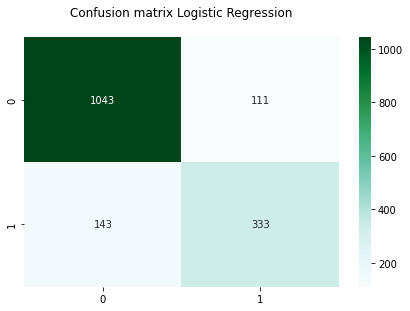

In [ ]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_LR = confusion_matrix(y_test,y_pred_lr)
sn.heatmap(confusion_matrix_LR, annot=True,cmap="BuGn" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      1154
         1.0       0.75      0.70      0.72       476

    accuracy                           0.84      1630
   macro avg       0.81      0.80      0.81      1630
weighted avg       0.84      0.84      0.84      1630



### **Results before removing 'DUIS' feature**

Text(0.5, 1.0, 'Confusion matrix Logistic Regression\n')

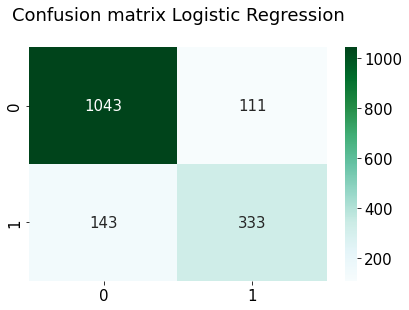

In [ ]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_LR = confusion_matrix(y_test,y_pred_lr)
sn.heatmap(confusion_matrix_LR, annot=True,cmap="BuGn" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      1154
         1.0       0.75      0.70      0.72       476

    accuracy                           0.84      1630
   macro avg       0.81      0.80      0.81      1630
weighted avg       0.84      0.84      0.84      1630



**We can conclude that the feature 'DUIS' doesn't contribute a lot in our model because after removing this feature and run the model again the same output is resulted comparing to when we had this feature in our data.**

# __Final Comment__
In our case **Logistic Regression** worked better than **Naive Bayes**. However, we assumed that **by having small size datasets Naive Bayes should work better than Logistic Regression**. We believe that **our result can be explained by the nature of Big Data’s interdependence**. ​​More precisely, Naive Bayes assumes that the features are conditionally independent, meaning that all of the features are independent from one another. Real datasets are however never perfectly independent, rather they can be quite interdependent. In short, as we discussed in the class, Naive Bayes method has a higher bias but lower variance, compared to Logistic Regression. If the dataset follows the bias, then Naive Bayes will be a better classifier. Based on the correlation heatmap, as shown on the notebook, we assumed that there are some correlations between different features and this can explain why Naive Bayes underperformed in comparison to Logistic Regression.
